In [1]:
import os
import pandas as pd
import numpy as np
import pydicom
import matplotlib.pyplot as plt
import SimpleITK as sitk

In [2]:
path_to_db = "/home/rmaguado/ruben/datasets/DeepRDT_lung/"

path_to_scans = os.path.join(path_to_db, "lung")
patient_folders = [
    path for path in os.listdir(path_to_scans) \
    if os.path.isdir(os.path.join(path_to_scans, path))
]
patient_folders.sort()

path_mapping = os.path.join(path_to_db, "mapping_df_lung_noDupli_wNewPatient2022.csv")
path_metadata_1 = os.path.join(path_to_db, "DeepRDTPulmon_DATA_2024-07-17_1215.csv")
path_metadata_2 = os.path.join(path_to_db, "CodigoPacientes.csv")
metadata_1 = pd.read_csv(path_metadata_1, delimiter=";")
metadata_1 = metadata_1.rename(columns={'nhc_sap': 'PID'})
metadata_1['PID'] = metadata_1['PID'].astype(int)
metadata_2 = pd.read_csv(path_metadata_2)
metadata_2 = metadata_2.rename(columns={'Num. SAP': 'PID'})
metadata_2['PID'] = metadata_2['PID'].astype(int)
mapping = pd.read_csv(path_mapping)
combined = pd.merge(metadata_1, mapping, on='PID', how='inner')
combined = pd.merge(combined, metadata_2, on='PID', how='inner')

withct = combined[combined['MAPID'].astype(str).isin(patient_folders)]
len(withct)

354

In [31]:
sample_number = 1
sample_patient_path = os.path.join(path_to_scans, withct['MAPID'].iloc[sample_number].astype(str))
series_IDs = sitk.ImageSeriesReader.GetGDCMSeriesIDs(sample_patient_path)
len(series_IDs)

27

In [32]:
sample_patient_path

'/home/rmaguado/ruben/datasets/DeepRDT_lung/lung/100687'

In [33]:
scans = []
for i, series_id in enumerate(series_IDs):
    series_reader = sitk.ImageSeriesReader()
    series_file_names = sitk.ImageSeriesReader.GetGDCMSeriesFileNames(
        sample_patient_path, series_id
    )
    
    dcm = pydicom.dcmread(series_file_names[0])
    media_storage = get_mediastorage(dcm)
    body_part = get_bodypart(dcm)
    filter_type = get_filter(dcm)
    series_num = get_series_num(dcm)
    series_id = get_series_id(dcm)
    study_id = get_study_id(dcm)
    width = get_window_width(dcm)

    if media_storage == "CT" and filter_type != 'Tit V1,HF V1' and filter_type is not None:
        series_reader = sitk.ImageSeriesReader()
        series_reader.SetFileNames(series_file_names)
        image = series_reader.Execute()
        image_array = sitk.GetArrayViewFromImage(image).astype(np.float32)
        image_shape = image_array.shape
        scans.append((series_num, series_file_names, image_array))
        print(series_num, f"({media_storage})", f"({filter_type})", body_part)
    
    

10300 (CT) (B) None
10301 (CT) (B) None
50387 (CT) (B) None
10393 (CT) (B) None
10397 (CT) (B) None
10396 (CT) (B) None
10395 (CT) (B) None
10398 (CT) (B) None
10392 (CT) (B) None
10394 (CT) (B) None
3 (CT) (BODY FILTER) None
10399 (CT) (B) None


series number: 10399
shape: (119, 512, 512)


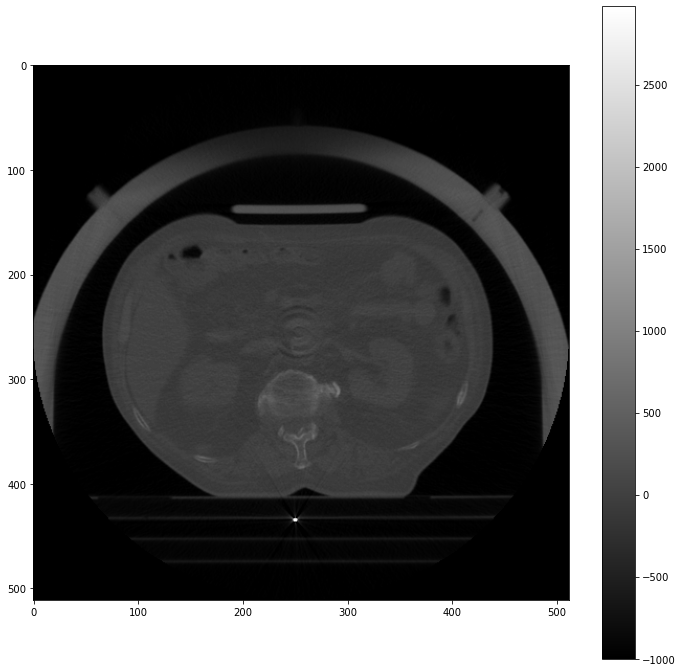

In [37]:
scan_id = -1
slice_num = 0

series_num, series_file_names, image_array = scans[scan_id]
print("series number:", series_num)
print("shape:", image_array.shape)
plt.figure(figsize=(12,12))
plt.imshow(image_array[slice_num], cmap="gray")
plt.colorbar()
plt.show()

In [38]:
dcm = pydicom.dcmread(series_file_names[0])
dcm

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 190
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: CT Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.840.113704.1.111.2484.1420710666.3146
(0002, 0010) Transfer Syntax UID                 UI: Implicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.3.6.1.4.1.30071.8
(0002, 0013) Implementation Version Name         SH: 'fo-dicom 0.0.0'
(0002, 0016) Source Application Entity Title     AE: 'DADaemon'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 192'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'AXIAL', 'HELIX']
(0008, 0012) Instance Creation Date              DA: '19010101'
(0008, 0013) Instance Creation Time              TM: '000000'
(0008, 0016) SOP Class UID              

In [48]:
dcm = pydicom.dcmread(series_file_names[0])
dcm

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 204
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: CT Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.246.352.205.4627806597413960456.8787869777700057759
(0002, 0010) Transfer Syntax UID                 UI: Implicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.3.6.1.4.1.30071.8
(0002, 0013) Implementation Version Name         SH: 'fo-dicom 0.0.0'
(0002, 0016) Source Application Entity Title     AE: 'DADaemon'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 192'
(0008, 0008) Image Type                          CS: ['DERIVED', 'SECONDARY', 'AXIAL']
(0008, 0012) Instance Creation Date              DA: '19010101'
(0008, 0013) Instance Creation Time              TM: '000000'
(0008, 0016) SOP Class UID        